In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

## Loading Data

In [ ]:
# reading data 
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House Price/train.csv')

## Exploratory Data Analysis


In [ ]:
train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  ...  ScreenPorch  \
0          2003       196.0         706        150  ...            0   
1          1976         0.0         978        284  ...            0   
2          2002       162.0         486        434  ...            0   
3          1970         0.0         216        540  ...            0   
4          2000       350.0         655        490  ...            0   

   PoolArea  SalePrice  MSZoning  Utilities  BldgType  Heating  KitchenQual  \
0         0     208500        RL     AllPub      1Fam     GasA           Gd   
1         0     181500        RL     AllPub      1Fam     GasA           TA   
2         0     223500        RL     AllPub      1Fam     GasA           Gd   
3         0     140000        RL     AllPub      1Fam     GasA           Gd   
4         0     250000        RL     AllPub      1Fam     GasA           Gd   

   SaleCondition  LandSlope  
0         Normal        Gtl  
1         Normal        Gtl  
2         Normal        Gtl  
3        Abnorml        Gtl  
4         Normal        Gtl  

[5 rows x 37 columns]

In [ ]:
train.shape

(1460, 81)

Jelas bahwa SalePrice tidak mengikuti distribusi normal, jadi sebelum melakukan regresi itu harus diubah. Meskipun transformasi log melakukan pekerjaan yang cukup baik, yang paling cocok adalah distribusi Johnson yang tidak terbatas.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

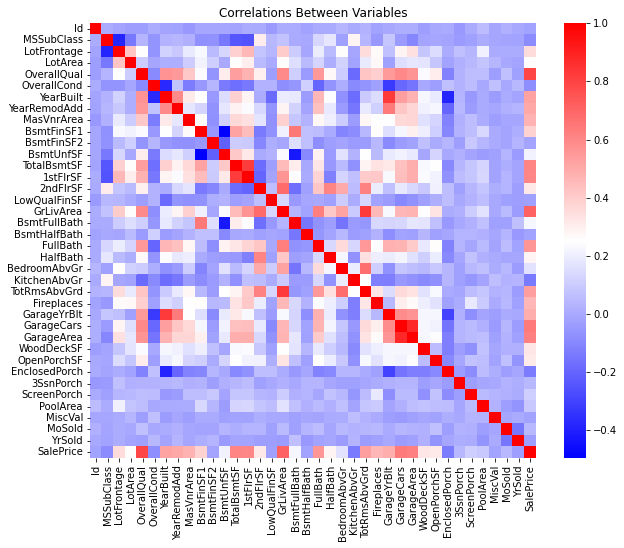

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), cmap='bwr')
plt.title('Correlations Between Variables', size = 12)
plt.show()

## Feature Selection

Untuk data numerik yang memiliki lebih dari 0,50 atau kurang dari -0,50 tingkat korelasi berdasarkan Metode Korelasi Pearson yang merupakan nilai default parameter "metode" dalam fungsi corr(). Sedangkan untuk data kategoris, saya memilih nilai kategoris yang saya yakini memiliki efek signifikan pada variabel target seperti Heating dan MSZoning.

In [ ]:
important_num_cols = list(train.corr()['SalePrice'][(train.corr()['SalePrice'] > 0.05) | (train.corr()['SalePrice'] < -0.05)].index)
cat_cols = ['MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']
important_cols = important_num_cols + cat_cols

train = train[important_cols]

In [ ]:
# Check missing value
print('Missing Value by Column')
print('-'*30)
print(train.isna().sum())
print('-'*30)
print('Total Missing Value :', train.isna().sum().sum())

Missing Value by Column
------------------------------
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
PoolArea           0
SalePrice          0
MSZoning           0
Utilities          0
BldgType           0
Heating            0
KitchenQual        0
SaleCondition      0
LandSlope          0
dtype: int64
------------------------------
Total Missing Value : 348


## Data Visualization

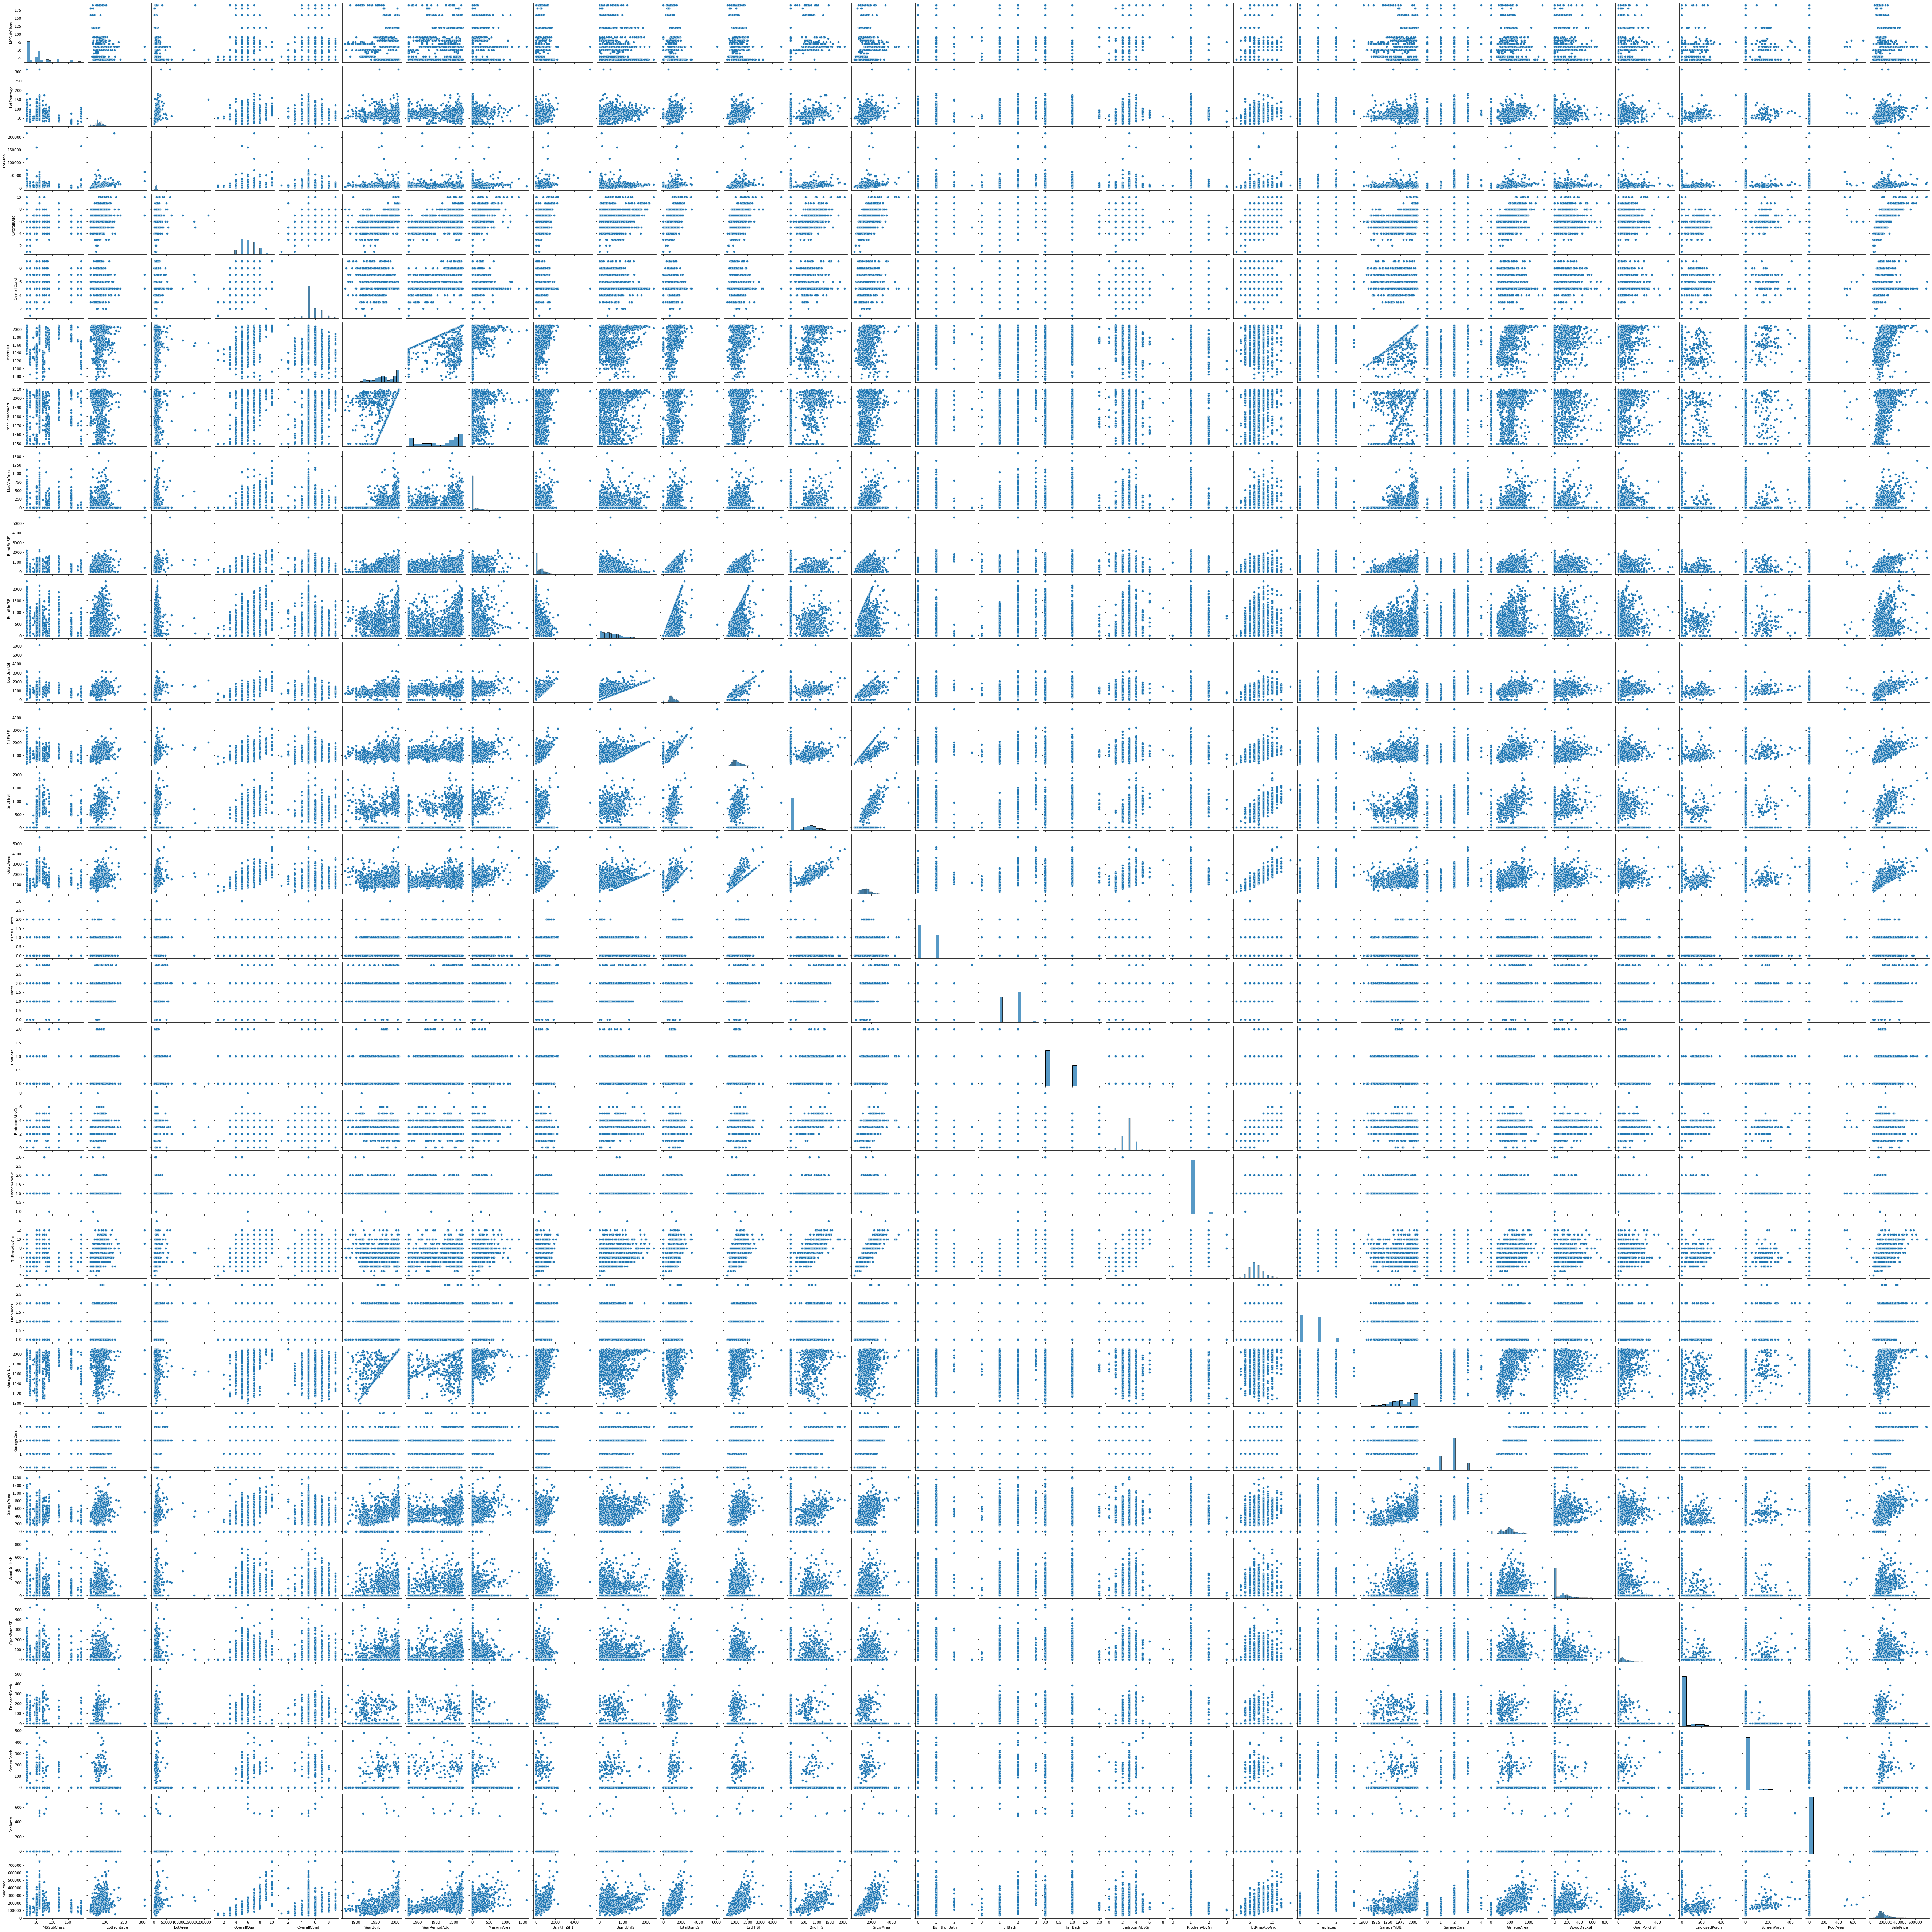

In [ ]:
sns.pairplot(train[important_num_cols])

<Figure size 720x576 with 0 Axes>

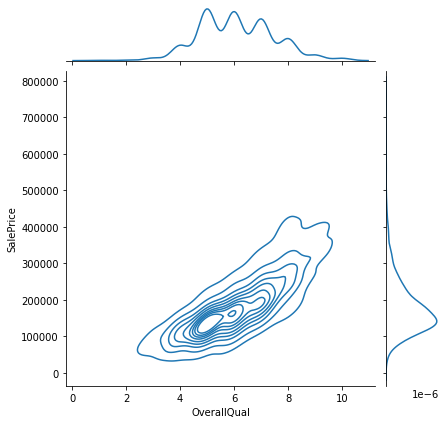

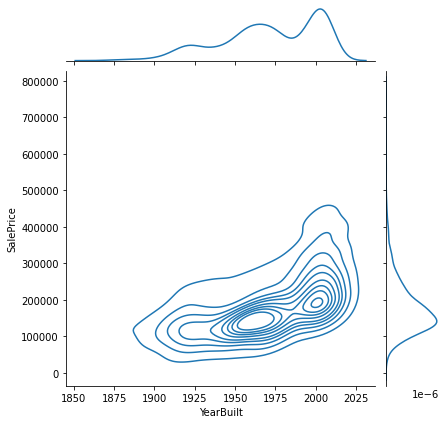

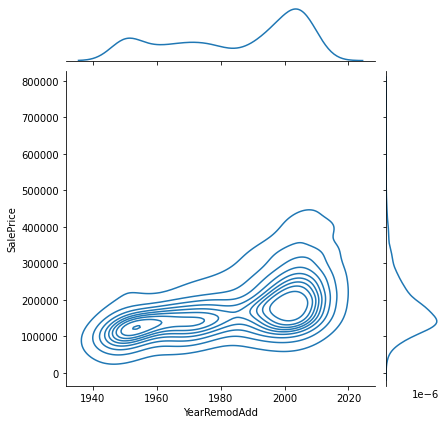

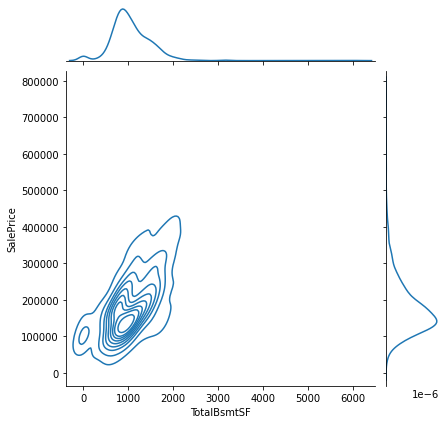

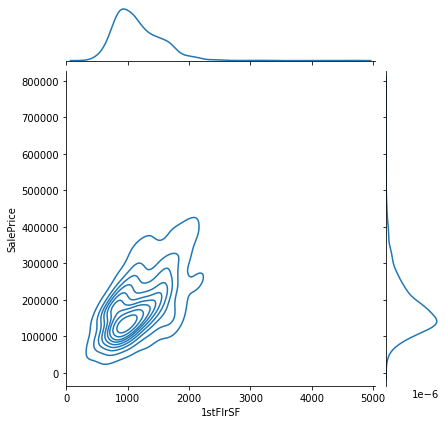

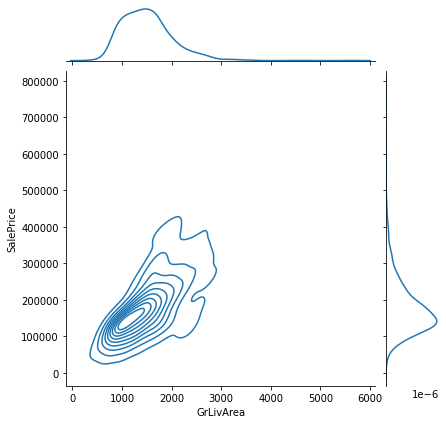

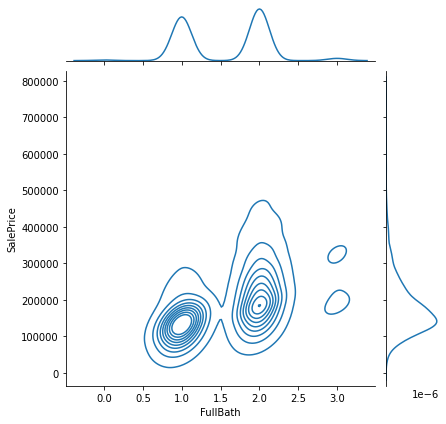

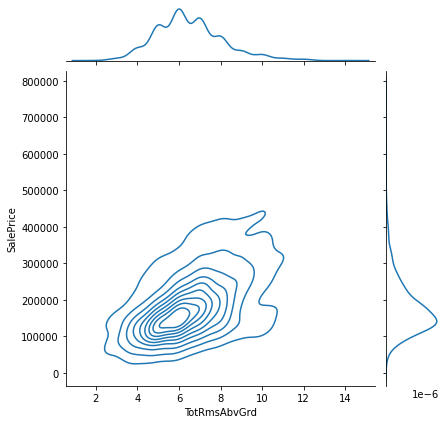

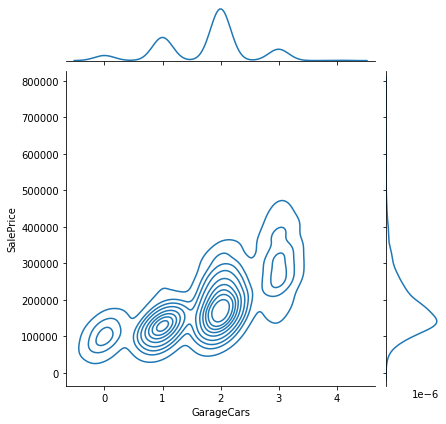

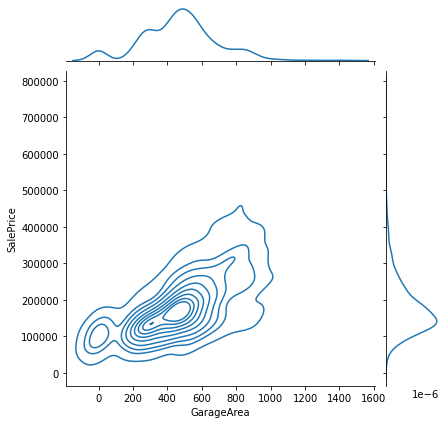

In [44]:
plt.figure(figsize=(10, 8))
sns.jointplot(x = train['OverallQual'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['YearBuilt'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['YearRemodAdd'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['TotalBsmtSF'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['1stFlrSF'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['GrLivArea'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['FullBath'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['TotRmsAbvGrd'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['GarageCars'], y = train['SalePrice'], kind='kde')
sns.jointplot(x = train['GarageArea'], y = train['SalePrice'], kind='kde')
plt.show()

## x, y Split

In [46]:
x = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

## One Hot Encoding

In [47]:
x = pd.get_dummies(x, columns=cat_cols)

## Standardizing the Data  

In [48]:
important_num_cols.remove('SalePrice')

scaler = StandardScaler()
x[important_num_cols] = scaler.fit_transform(x[important_num_cols])

In [52]:
x.head().T

0         1         2         3         4
MSSubClass             0.073375 -0.872563  0.073375  0.309859  0.073375
LotFrontage           -0.208034  0.409895 -0.084449 -0.414011  0.574676
LotArea               -0.207142 -0.091886  0.073480 -0.096897  0.375148
OverallQual            0.651479 -0.071836  0.651479  0.651479  1.374795
OverallCond           -0.517200  2.179628 -0.517200 -0.517200 -0.517200
YearBuilt              1.050994  0.156734  0.984752 -1.863632  0.951632
YearRemodAdd           0.878668 -0.429577  0.830215 -0.720298  0.733308
MasVnrArea             0.510015 -0.572835  0.322174 -0.572835  1.360826
BsmtFinSF1             0.575425  1.171992  0.092907 -0.499274  0.463568
BsmtUnfSF             -0.944591 -0.641228 -0.301643 -0.061670 -0.174865
TotalBsmtSF           -0.459303  0.466465 -0.313369 -0.687324  0.199680
1stFlrSF              -0.793434  0.257140 -0.627826 -0.521734 -0.045611
2ndFlrSF               1.161852 -0.795163  1.189351  0.937276  1.617877
GrLivArea              0.370333 -0.482512  0.515013  0.383659  1.299326
BsmtFullBath           1.107810 -0.819964  1.107810  1.107810  1.107810
FullBath               0.789741  0.789741  0.789741 -1.026041  0.789741
HalfBath               1.227585 -0.761621  1.227585 -0.761621  1.227585
BedroomAbvGr           0.163779  0.163779  0.163779  0.163779  1.390023
KitchenAbvGr          -0.211454 -0.211454 -0.211454 -0.211454 -0.211454
TotRmsAbvGrd           0.912210 -0.318683 -0.318683  0.296763  1.527656
Fireplaces            -0.951226  0.600495  0.600495  0.600495  0.600495
GarageYrBlt            0.992426 -0.101543  0.911391  0.789839  0.870874
GarageCars             0.311725  0.311725  0.311725  1.650307  1.650307
GarageArea             0.351000 -0.060731  0.631726  0.790804  1.698485
WoodDeckSF            -0.752176  1.626195 -0.752176 -0.752176  0.780197
OpenPorchSF            0.216503 -0.704483 -0.070361 -0.176048  0.563760
EnclosedPorch         -0.359325 -0.359325 -0.359325  4.092524 -0.359325
ScreenPorch           -0.270208 -0.270208 -0.270208 -0.270208 -0.270208
PoolArea              -0.068692 -0.068692 -0.068692 -0.068692 -0.068692
MSZoning_C (all)       0.000000  0.000000  0.000000  0.000000  0.000000
MSZoning_FV            0.000000  0.000000  0.000000  0.000000  0.000000
MSZoning_RH            0.000000  0.000000  0.000000  0.000000  0.000000
MSZoning_RL            1.000000  1.000000  1.000000  1.000000  1.000000
MSZoning_RM            0.000000  0.000000  0.000000  0.000000  0.000000
Utilities_AllPub       1.000000  1.000000  1.000000  1.000000  1.000000
Utilities_NoSeWa       0.000000  0.000000  0.000000  0.000000  0.000000
BldgType_1Fam          1.000000  1.000000  1.000000  1.000000  1.000000
BldgType_2fmCon        0.000000  0.000000  0.000000  0.000000  0.000000
BldgType_Duplex        0.000000  0.000000  0.000000  0.000000  0.000000
BldgType_Twnhs         0.000000  0.000000  0.000000  0.000000  0.000000
BldgType_TwnhsE        0.000000  0.000000  0.000000  0.000000  0.000000
Heating_Floor          0.000000  0.000000  0.000000  0.000000  0.000000
Heating_GasA           1.000000  1.000000  1.000000  1.000000  1.000000
Heating_GasW           0.000000  0.000000  0.000000  0.000000  0.000000
Heating_Grav           0.000000  0.000000  0.000000  0.000000  0.000000
Heating_OthW           0.000000  0.000000  0.000000  0.000000  0.000000
Heating_Wall           0.000000  0.000000  0.000000  0.000000  0.000000
KitchenQual_Ex         0.000000  0.000000  0.000000  0.000000  0.000000
KitchenQual_Fa         0.000000  0.000000  0.000000  0.000000  0.000000
KitchenQual_Gd         1.000000  0.000000  1.000000  1.000000  1.000000
KitchenQual_TA         0.000000  1.000000  0.000000  0.000000  0.000000
SaleCondition_Abnorml  0.000000  0.000000  0.000000  1.000000  0.000000
SaleCondition_AdjLand  0.000000  0.000000  0.000000  0.000000  0.000000
SaleCondition_Alloca   0.000000  0.000000  0.000000  0.000000  0.000000
SaleCondition_Family   0.000000  0.000000  0.000000  0.000000  0.00000

## Train-Test Split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [56]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring = 'neg_mean_squared_error', cv = 5)).mean()
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

## Machine Learning Models

In [58]:
models = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'RMSE (Cross-Validaiton)'])

## Linear Regression

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE', mae)
print('MSE', mse)
print('RMSE', rmse)
print('R2 Score', r_squared)
print('-'*30)
rmse_cross_val = rmse_cv(lin_reg)
print('RMSE Cross-Validation : ', rmse_cross_val)

new_row = {'Model' : 'LinearRegression', 'MAE ' : mae, 'RMSE ' : rmse, 'RQ Score ' : r_squared, 'RMSE (Cross-Validation)' : rmse_cross_val}
models = models.append(new_row, ignore_index = True)

ValueError: ignored